In [1]:
import xarray as xr
import numpy as np
from os.path import expanduser
home = expanduser("~")
import skimage.measure as skm
import matplotlib.pyplot as plt

In [2]:
folder = home + '/Documents/data/obs/ds'
# folder = '/g/data/k10/cb4968/data/obs/GPCP'
fileName = 'GPCP_precip_raw.nc'
path = folder + '/' + fileName
ds = xr.open_dataset(path)
ds

<xarray.Dataset>
Dimensions:  (lat: 71, lon: 360, time: 9343)
Coordinates:
  * lat      (lat) float32 -35.0 -34.0 -33.0 -32.0 -31.0 ... 32.0 33.0 34.0 35.0
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * time     (time) datetime64[ns] 1996-10-01 1996-10-02 ... 2022-04-30
Data variables:
    precip   (time, lat, lon) float32 ...

In [3]:
precip = ds.precip
precip

<xarray.DataArray 'precip' (time: 9343, lat: 71, lon: 360)>
[238807080 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -35.0 -34.0 -33.0 -32.0 -31.0 ... 32.0 33.0 34.0 35.0
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * time     (time) datetime64[ns] 1996-10-01 1996-10-02 ... 2022-04-30
Attributes:
    long_name:      NOAA Climate Data Record (CDR) of Daily GPCP Satellite-Ga...
    standard_name:  lwe_precipitation_rate
    units:          mm/day
    valid_range:    [  0. 100.]
    cell_methods:   area: mean time: mean
    coordinates:    time latitude longitude

In [10]:
valid_range = [0, 100]
precip = precip.where((precip >= valid_range[0]) & (precip <= valid_range[1]), np.nan)

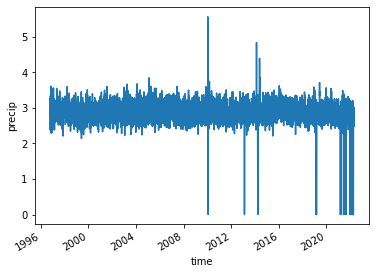

In [ ]:
precip.mean(dim = ('lat', 'lon')).plot()

In [ ]:
from metrics.funcs.vars.myFuncs import *

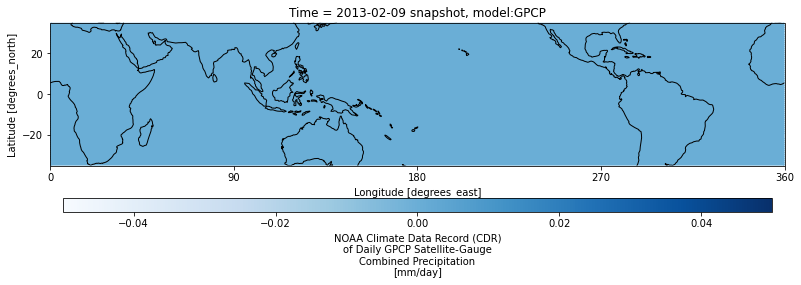

In [ ]:
time_test = '2013-02-09'
plot_snapshot(precip.sel(time=time_test), 'Blues', "Time = " + time_test,'GPCP')

In [ ]:
precip = precip.where(precip.sum(dim =('lat','lon')) != 0, np.nan)

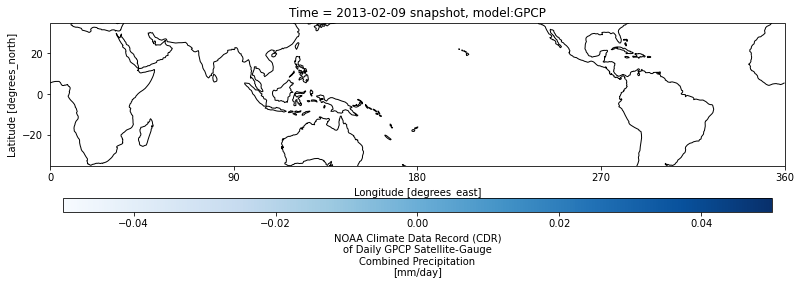

In [ ]:
time_test = '2013-02-09'
plot_snapshot(precip.sel(time=time_test), 'Blues', "Time = " + time_test,'GPCP')

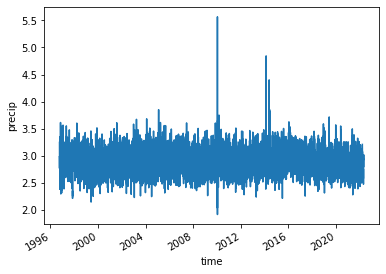

In [ ]:
precip.mean(dim = ('lat', 'lon')).plot()

In [ ]:
precip = precip.dropna('time', how='all')

In [ ]:
time_test = '2013-02-09'
plot_snapshot(precip.sel(time=time_test), 'Blues', "Time = " + time_test,'GPCP')

KeyError: '2013-02-09'

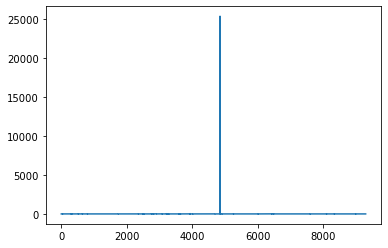

In [ ]:
nb_nan = precip.isnull().sum(dim=('lat', 'lon'))
plt.plot(nb_nan)

In [ ]:
threshold = 0.5
precip = precip.where(precip.isnull().sum(dim=('lat','lon'))/(precip.shape[1]*precip.shape[2]) < threshold, other=np.nan)

In [ ]:
precip = precip.dropna('time', how='all')

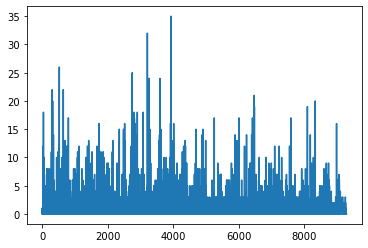

In [ ]:
nb_nan = precip.isnull().sum(dim=('lat', 'lon'))
plt.plot(nb_nan)

In [33]:
# print(precip.sel(time='2010-03-01').max(dim=('lat','lon'))) # need to set large valid ragge for this

<xarray.DataArray 'precip' ()>
array(113.46584, dtype=float32)
Coordinates:
    time     datetime64[ns] 2010-03-01


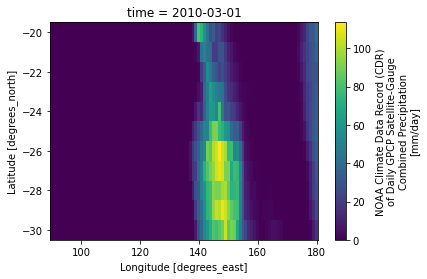

In [5]:
precip.sel(time='2010-03-01').sel(lat=slice(-30,-20), lon=slice(90,180)).plot()

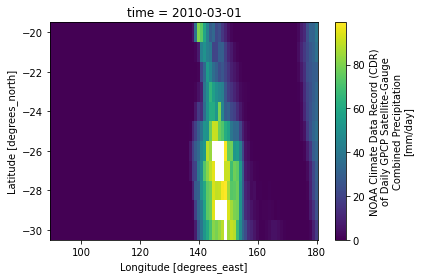

In [ ]:
precip.sel(time='2010-03-01').sel(lat=slice(-30,-20), lon=slice(90,180)).plot()

In [6]:
print(precip.sel(time='2014-05-23').max(dim=('lat','lon'))) # need to set large valid ragge for this

<xarray.DataArray 'precip' ()>
array(2252.7998, dtype=float32)
Coordinates:
    time     datetime64[ns] 2014-05-23


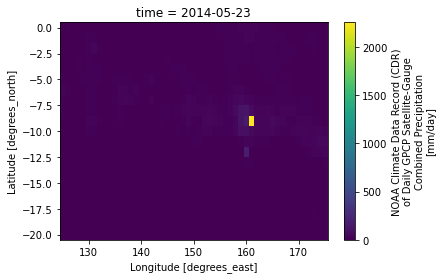

In [9]:
precip.sel(time='2014-05-23').sel(lat=slice(-20,0),lon=slice(125,175)).plot()

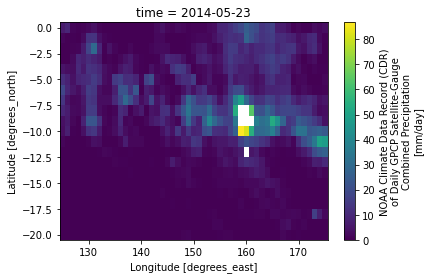

In [11]:
precip.sel(time='2014-05-23').sel(lat=slice(-20,0),lon=slice(125,175)).plot()

In [ ]:
nan_days =np.nonzero(nb_nan.data)[0]

In [ ]:
nan_days

array([   1,    7,   15, ..., 9257, 9262, 9273])

In [ ]:
len(nan_days)

2469

In [ ]:
#test
# import xarray as xr
# import numpy as np

# precip = xr.DataArray(
#     np.random.randn(10, 8, 8),
#     dims=("time", "lat", "lon"),
#     coords={"time": np.arange(10), "lat": [1, 2, 3, 4, 5, 6, 7, 8], "lon": [1, 2, 3, 4, 5, 6, 7, 8]}
# )

# precip[0, 1:4, 1:4] = np.nan
# precip[1, 1:4, 1:4] = np.nan
# precip[1,:,:].plot()

In [ ]:
from scipy.interpolate import griddata

for day in nan_days:

    time_slice = precip.isel(time=day)
    nan_indices = np.argwhere(np.isnan(time_slice.values))
    nonnan_indices = np.argwhere(~np.isnan(time_slice.values))
    interpolated_values = griddata(nonnan_indices, time_slice.values[~np.isnan(time_slice.values)], nan_indices, method='nearest')
    time_slice.values[nan_indices[:, 0], nan_indices[:, 1]] = interpolated_values

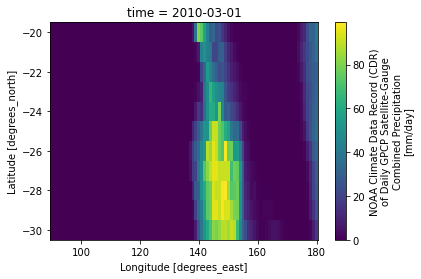

In [ ]:
precip.sel(time='2010-03-01').sel(lat=slice(-30,-20), lon=slice(90,180)).plot()

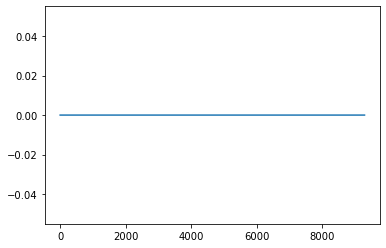

In [ ]:
nb_nan = precip.isnull().sum(dim=('lat', 'lon'))
plt.plot(nb_nan)

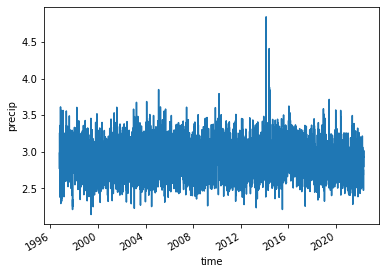

In [ ]:
precip.mean(dim = ('lat', 'lon')).plot()

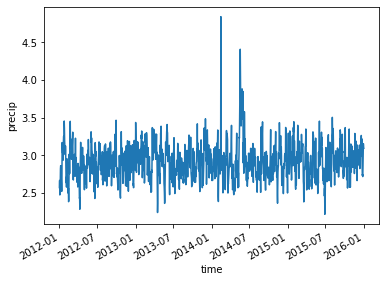

In [ ]:
precip.sel(time=slice('2012-01-01', '2016-01-01')).mean(dim = ('lat', 'lon')).plot()

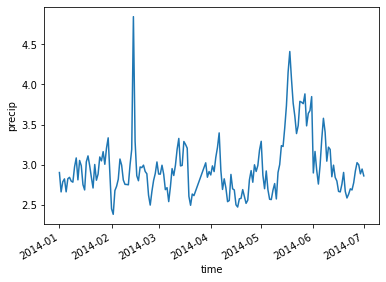

In [ ]:
precip.sel(time=slice('2014-01-01', '2014-07-01')).mean(dim = ('lat', 'lon')).plot()

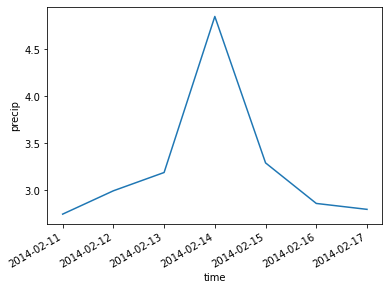

In [ ]:
precip.sel(time=slice('2014-02-11', '2014-02-17')).mean(dim = ('lat', 'lon')).plot()

In [26]:
# precip_section = precip.sel(time=slice('2014-02-12', '2014-02-18'))

# for i in np.arange(0, len(precip_section.time.values)):
#     plot_snapshot(precip.isel(time=i), 'Blues', "Time = " + str(precip_section.coords['time'].values[i])[:10],'GPCP')

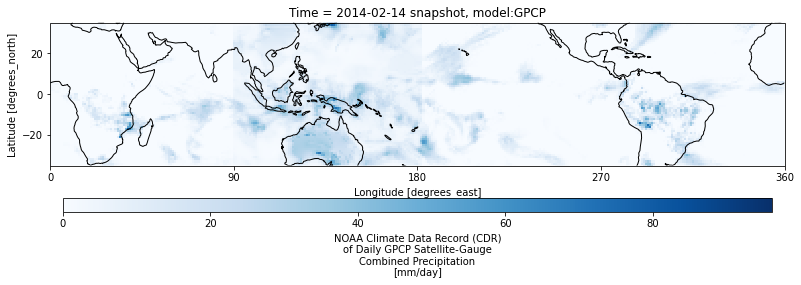

In [ ]:
time_test = '2014-02-14'
plot_snapshot(precip.sel(time=time_test), 'Blues', "Time = " + time_test,'GPCP')

In [ ]:
precip.sel(time=time_test).mean(dim=('lat','lon'))

<xarray.DataArray 'precip' ()>
array(4.844234, dtype=float32)
Coordinates:
    time     datetime64[ns] 2014-02-14

In [ ]:
np.sort(precip.sel(time=time_test).values.flatten())[-50:]

array([49.184208, 49.9542  , 50.416492, 50.725304, 50.739704, 50.980785,
       51.323265, 51.473953, 51.56937 , 51.660843, 51.706715, 51.71601 ,
       52.06079 , 52.765762, 52.91799 , 53.316807, 53.41661 , 54.364937,
       54.787083, 55.24814 , 55.65631 , 56.023148, 56.17202 , 56.190285,
       56.261147, 56.768883, 58.045933, 58.480606, 59.256443, 59.65784 ,
       60.439053, 61.520195, 64.28086 , 64.498055, 65.216934, 65.98826 ,
       66.08043 , 66.44141 , 66.45409 , 69.2095  , 72.48324 , 73.204216,
       73.71301 , 75.0904  , 77.6453  , 78.8654  , 81.004326, 81.9803  ,
       89.52314 , 96.18045 ], dtype=float32)

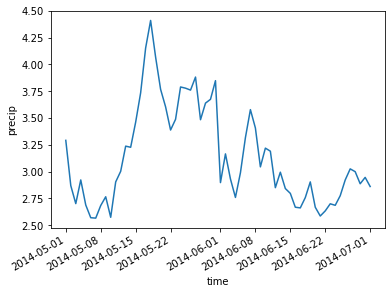

In [ ]:
precip.sel(time=slice('2014-05-01', '2014-07-01')).mean(dim = ('lat', 'lon')).plot()

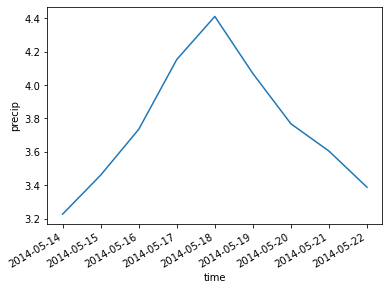

In [ ]:
precip.sel(time=slice('2014-05-14', '2014-05-22')).mean(dim = ('lat', 'lon')).plot()

In [27]:
# precip_section = precip.sel(time=slice('2014-05-14', '2014-05-22'))

# for i in np.arange(0, len(precip_section.time.values)):
#     plot_snapshot(precip.isel(time=i), 'Blues', "Time = " + str(precip_section.coords['time'].values[i])[:10],'GPCP')

In [ ]:
time_test = '2014-05-18'
precip.sel(time=time_test).mean(dim=('lat','lon'))

<xarray.DataArray 'precip' ()>
array(4.4098196, dtype=float32)
Coordinates:
    time     datetime64[ns] 2014-05-18

In [ ]:
np.sort(precip.sel(time=time_test).values.flatten())[-50:]

array([68.31055 , 68.77369 , 69.376144, 69.555695, 69.558395, 69.59669 ,
       70.096886, 70.17539 , 70.26014 , 70.36388 , 70.36481 , 70.58224 ,
       70.690956, 71.081665, 71.102196, 71.30892 , 72.22693 , 72.426575,
       72.45823 , 73.24515 , 73.528824, 74.12131 , 75.23135 , 75.33197 ,
       75.45765 , 75.80493 , 78.64749 , 78.79509 , 78.956955, 79.29534 ,
       80.3236  , 80.63632 , 80.791084, 82.3413  , 82.36064 , 82.434494,
       82.49712 , 83.723274, 83.795525, 84.900925, 90.21701 , 90.423004,
       90.97766 , 91.65599 , 92.383446, 92.383446, 93.0323  , 93.448685,
       94.56749 , 94.56749 ], dtype=float32)

In [ ]:
precip

<xarray.DataArray 'precip' (time: 9294, lat: 71, lon: 360)>
array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [1.24405062e+00, 1.17564774e+00, 5.09209216e-01, ...,
         1.41485035e-01, 2.46518895e-01, 7.92021036e-01],
        [3.70203018e+00, 2.64962578e+00, 1.47164953e+00, ...,
         1.33630061e+00, 1.80621719e+00, 3.90008402e+00],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
...
        [1.68807583e+01, 2.28698769e+01, 2.14786377e+01, ...,
         5.49256206e-02, 1.09845746e+00, 6.20279598e+00],
        [3.60136724e+00, 3.67121553e+00, 4.17802906e+00, ...,
         1.61528194e+00, 4.93976176e-01, 2.31147647e+00],
        [5.38746834e+00, 4.11637926e+00, 1.14184189e+00, ...,
         1.28422987e+00, 4.18579483e+00, 4.60221529e+00]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [2.33176700e-03, 0.00000000e+00, 0.00000000e+00, ...,
         9.51312780e-01, 1.06344268e-01, 6.69635739e-03],
        ...,
        [0.00000000e+00, 0.00000000e+00, 2.27834597e-01, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 3.74256372e-01, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 1.58364609e-01, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -35.0 -34.0 -33.0 -32.0 -31.0 ... 32.0 33.0 34.0 35.0
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * time     (time) datetime64[ns] 1996-10-01 1996-10-02 ... 2022-04-30
Attributes:
    long_name:      NOAA Climate Data Record (CDR) of Daily GPCP Satellite-Ga...
    standard_name:  lwe_precipitation_rate
    units:          mm/day
    valid_range:    [  0. 100.]
    cell_methods:   area: mean time: mean
    coordinates:    time latitude longitude

In [ ]:
# folder = home + '/Documents/data/obs/GPCP'
# fileName = 'GPCP_precip_processed.nc'
# dataSet = precip
# save_file(dataSet, folder, fileName)